In [13]:
import os
import sys
import pickle
import numpy as np
import pandas as pd
from PIL import Image, ImageFilter
from tqdm.notebook import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss, confusion_matrix
import matplotlib.pyplot as plt

np.random.seed(100)
LEVEL = 'level_1'

In [14]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def grad_w_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    if y == 0:
      return y_pred * x
    elif y == 1:
      return -1 * (1 - y_pred) * x
    else:
      raise ValueError("y should be 0 or 1")
    
  def grad_b_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    if y == 0:
      return y_pred 
    elif y == 1:
      return -1 * (1 - y_pred)
    else:
      raise ValueError("y should be 0 or 1")
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, loss_fn="mse", display_loss=False):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
      
    if display_loss:
      loss = {}
    
    for i in tqdm(range(epochs), total=epochs, unit="epoch"):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        if loss_fn == "mse":
          dw += self.grad_w_mse(x, y)
          db += self.grad_b_mse(x, y) 
        elif loss_fn == "ce":
          dw += self.grad_w_ce(x, y)
          db += self.grad_b_ce(x, y)
      self.w -= learning_rate * dw
      self.b -= learning_rate * db
      
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        if loss_fn == "mse":
          loss[i] = mean_squared_error(Y, Y_pred)
        elif loss_fn == "ce":
          loss[i] = log_loss(Y, Y_pred)
    
    if display_loss:
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      if loss_fn == "mse":
        plt.ylabel('Mean Squared Error')
      elif loss_fn == "ce":
        plt.ylabel('Log Loss')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

In [3]:
!unzip ../input/padhai-module1-level-1/level_1_train.zip

Archive:  ../input/padhai-module1-level-1/level_1_train.zip
   creating: level_1/
   creating: level_1/background/
  inflating: level_1/background/0.jpg  
  inflating: level_1/background/1.jpg  
  inflating: level_1/background/2.jpg  
  inflating: level_1/background/3.jpg  
  inflating: level_1/background/4.jpg  
  inflating: level_1/background/5.jpg  
  inflating: level_1/background/6.jpg  
  inflating: level_1/background/7.jpg  
  inflating: level_1/background/8.jpg  
  inflating: level_1/background/9.jpg  
  inflating: level_1/background/10.jpg  
  inflating: level_1/background/11.jpg  
  inflating: level_1/background/12.jpg  
  inflating: level_1/background/13.jpg  
  inflating: level_1/background/14.jpg  
  inflating: level_1/background/15.jpg  
  inflating: level_1/background/16.jpg  
  inflating: level_1/background/17.jpg  
  inflating: level_1/background/18.jpg  
  inflating: level_1/background/19.jpg  
  inflating: level_1/background/20.jpg  
  inflating: level_1/background/21

  inflating: level_1/background/4_d2.jpg  
  inflating: level_1/background/4_d3.jpg  
  inflating: level_1/background/40_d2.jpg  
  inflating: level_1/background/40_d3.jpg  
  inflating: level_1/background/41_d2.jpg  
  inflating: level_1/background/41_d3.jpg  
  inflating: level_1/background/42_d2.jpg  
  inflating: level_1/background/42_d3.jpg  
  inflating: level_1/background/43_d2.jpg  
  inflating: level_1/background/43_d3.jpg  
  inflating: level_1/background/44_d2.jpg  
  inflating: level_1/background/44_d3.jpg  
  inflating: level_1/background/45_d2.jpg  
  inflating: level_1/background/45_d3.jpg  
  inflating: level_1/background/47_d2.jpg  
  inflating: level_1/background/47_d3.jpg  
  inflating: level_1/background/48_d2.jpg  
  inflating: level_1/background/48_d3.jpg  
  inflating: level_1/background/49_d2.jpg  
  inflating: level_1/background/49_d3.jpg  
  inflating: level_1/background/5_d2.jpg  
  inflating: level_1/background/5_d3.jpg  
  inflating: level_1/background/50_d

In [4]:
!unzip ../input/padhai-module1-level-1/level_1_test.zip

Archive:  ../input/padhai-module1-level-1/level_1_test.zip
   creating: kaggle_level_1/
  inflating: kaggle_level_1/0.jpg    
  inflating: kaggle_level_1/1.jpg    
  inflating: kaggle_level_1/2.jpg    
  inflating: kaggle_level_1/3.jpg    
  inflating: kaggle_level_1/4.jpg    
  inflating: kaggle_level_1/5.jpg    
  inflating: kaggle_level_1/6.jpg    
  inflating: kaggle_level_1/7.jpg    
  inflating: kaggle_level_1/8.jpg    
  inflating: kaggle_level_1/9.jpg    
  inflating: kaggle_level_1/10.jpg   
  inflating: kaggle_level_1/11.jpg   
  inflating: kaggle_level_1/12.jpg   
  inflating: kaggle_level_1/13.jpg   
  inflating: kaggle_level_1/14.jpg   
  inflating: kaggle_level_1/15.jpg   
  inflating: kaggle_level_1/16.jpg   
  inflating: kaggle_level_1/17.jpg   
  inflating: kaggle_level_1/18.jpg   
  inflating: kaggle_level_1/19.jpg   
  inflating: kaggle_level_1/20.jpg   
  inflating: kaggle_level_1/21.jpg   
  inflating: kaggle_level_1/22.jpg   
  inflating: kaggle_level_1/23.jpg   


In [5]:
!ls

__notebook_source__.ipynb  kaggle_level_1  level_1


In [6]:
def read_all(folder_path, key_prefix=""):
    '''
    It returns a dictionary with 'file names' as keys and 'flattened image arrays' as values.
    '''
    print("Reading:")
    images = {}
    files = os.listdir(folder_path)
    for i, file_name in tqdm_notebook(enumerate(files), total=len(files)):
        file_path = os.path.join(folder_path, file_name)
        image_index = key_prefix + file_name[:-4]
        image = Image.open(file_path)
        image = image.convert("L")
        images[image_index] = np.array(image.copy()).flatten()
        image.close()
    return images

In [8]:
languages = ['ta', 'hi', 'en']

images_train = read_all("/kaggle/working/"+LEVEL+"/"+"background", key_prefix='bgr_') # change the path
for language in languages:
  images_train.update(read_all("/kaggle/working/"+LEVEL+"/"+language, key_prefix=language+"_" ))
print(len(images_train))

images_test = read_all("/kaggle/working/kaggle_"+LEVEL, key_prefix='') # change the path
print(len(images_test))

Reading:


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  



Reading:



Reading:



Reading:



900
Reading:



300


In [9]:
list(images_test.keys())[:5]

['109', '227', '163', '242', '78']

In [10]:
X_train = []
Y_train = []
for key, value in images_train.items():
    X_train.append(value)
    if key[:4] == "bgr_":
        Y_train.append(0)
    else:
        Y_train.append(1)

ID_test = []
X_test = []
for key, value in images_test.items():
  ID_test.append(int(key))
  X_test.append(value)
  
        
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)

print(X_train.shape, Y_train.shape)
print(X_test.shape)

(900, 256) (900,)
(300, 256)


In [15]:
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

TypeError: float() argument must be a string or a number, not 'dict_values'

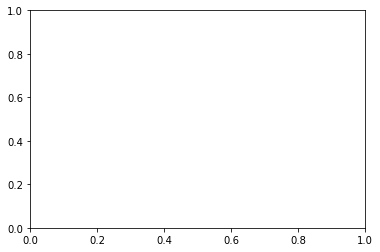

In [16]:
sn_mse = SigmoidNeuron()
sn_mse.fit(X_scaled_train, Y_train, epochs=100, learning_rate=0.015, loss_fn="mse", display_loss=True)

In [ ]:
sn_ce = SigmoidNeuron()
sn_ce.fit(X_scaled_train, Y_train, epochs=100, learning_rate=0.015, loss_fn="ce", display_loss=True)

In [ ]:
def print_accuracy(sn):
  Y_pred_train = sn.predict(X_scaled_train)
  Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
  accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
  print("Train Accuracy : ", accuracy_train)
  print("-"*50)

In [ ]:
print_accuracy(sn_mse)
print_accuracy(sn_ce)

## Sample Submission

In [ ]:
Y_pred_test = sn_ce.predict(X_scaled_test)
Y_pred_binarised_test = (Y_pred_test >= 0.5).astype("int").ravel()

submission = {}
submission['ImageId'] = ID_test
submission['Class'] = Y_pred_binarised_test

submission = pd.DataFrame(submission)
submission = submission[['ImageId', 'Class']]
submission = submission.sort_values(['ImageId'])
submission.to_csv("submisision.csv", index=False)